<a id = 'top'></a>

<h1><center>Linear Regression Assignment</center></h1>

<h2>Objective: To predict the demand for shared bikes for Boom Bikes </h2>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

Through this assignment , we are intending to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.  

### Importing the libraries

In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import datetime
import re
import warnings
warnings.simplefilter("ignore")
from pandas.api.types import  is_object_dtype, is_numeric_dtype
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

### Loading the data

In [362]:
df = pd.read_csv("regression_assignment.csv")
df.head(4)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562


### Understanding the Data

In [363]:
print(f"Shape of the Data: {df.shape}")

Shape of the Data: (730, 16)


In [364]:
df.info(verbose = 2, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [365]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Understanding the categorical Variable

In [366]:
cat_vars = ['season','yr','mnth', 'holiday','weekday','workingday','weathersit']
df_variance_cat = pd.DataFrame()
cols_list_cat = [col for col in cat_vars]
df_variance_cat['columns'] = cols_list_cat
df_variance_cat['unique_count'] = [df[col].nunique() for col in cols_list_cat]
df_variance_cat

,columns,unique_count
0,season,4
1,yr,2
2,mnth,12
3,holiday,2
4,weekday,7
5,workingday,2
6,weathersit,3


In [367]:
for col in cat_vars:
    display(df[col].value_counts().reset_index().rename(columns ={'index':col,col:'value_counts'}))

,season,value_counts
0,3,188
1,2,184
2,1,180
3,4,178


,yr,value_counts
0,0,365
1,1,365


,mnth,value_counts
0,1,62
1,3,62
2,5,62
3,7,62
4,8,62
5,10,62
6,12,62
7,4,60
8,6,60
9,9,60


,holiday,value_counts
0,0,709
1,1,21


,weekday,value_counts
0,0,105
1,1,105
2,6,105
3,2,104
4,4,104
5,5,104
6,3,103


,workingday,value_counts
0,1,499
1,0,231


,weathersit,value_counts
0,1,463
1,2,246
2,3,21


#### Understanding the numerical Variable

In [368]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_variance_num = pd.DataFrame()
cols_list_num = [col for col in num_vars]
df_variance_num['columns'] = cols_list_num
df_variance_num['unique_count'] = [df[col].nunique() for col in cols_list_num]
df_variance_num

,columns,unique_count
0,temp,498
1,atemp,689
2,hum,594
3,windspeed,649
4,cnt,695


### Inference

- the data has 16 attributes.
- there are 730 records at "instant" and "dteday" level. (these columns act as serial no. for the dataset here)
- there are no nulls in the data 
- there exists 7 categorical variables in the dataset.
- cat_vars = ['season','yr','mnth', 'holiday','weekday','workingday','weathersit']
- num_vars = ['temp','atemp','hum','windspeed']
- vars_not_available_for_training = ['casual','registered'] these might cause data leakage
- target_var = 'cnt' 
- The unique values in numerical variables justify the variance in data.
- few of the categorical variables are non-binary , hence we should explore ways of encoding.

### Dropping irrelevant variables 

In [369]:
df.drop(columns = ['instant','dteday','registered','casual'],inplace=True)
## these variables act as record level serail numbers for the data or are variables causing data leakage

### Understanding the correlation amongst variables

In [370]:
corr_matrix = df.corr()
corr_matrix = corr_matrix.reset_index()
corr_matrix["cnt_abs"] = np.abs(corr_matrix["cnt"])
corr_matrix[["index","cnt","cnt_abs"]].sort_values("cnt_abs",ascending= False)

,index,cnt,cnt_abs
11,cnt,1.000000,1.000000
8,atemp,0.630685,0.630685
7,temp,0.627044,0.627044
1,yr,0.569728,0.569728
0,season,0.404584,0.404584
6,weathersit,-0.295929,0.295929
2,mnth,0.278191,0.278191
10,windspeed,-0.235132,0.235132
9,hum,-0.098543,0.098543
3,holiday,-0.068764,0.068764


### Data Visualization

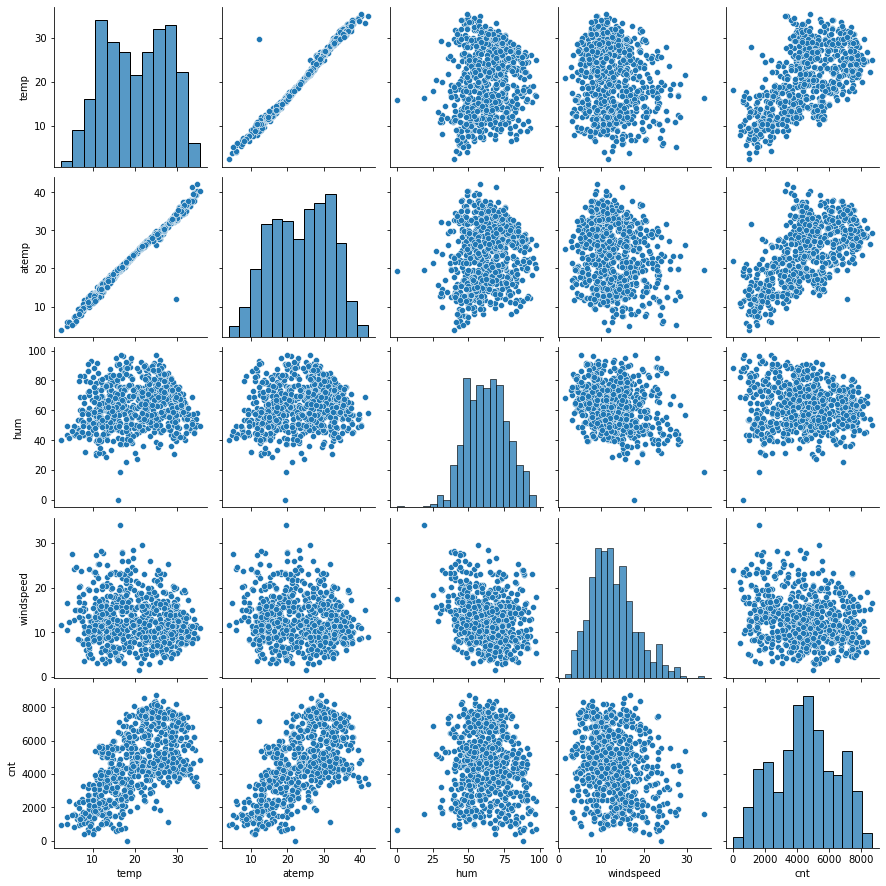

In [371]:
sns.pairplot(df[['temp','atemp','hum','windspeed','cnt']],  diag_kind="hist")

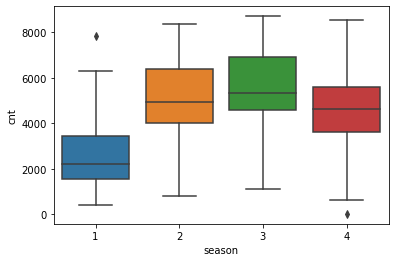

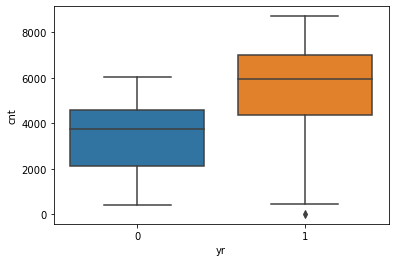

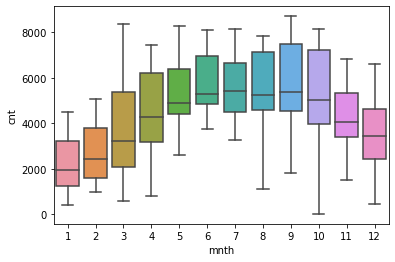

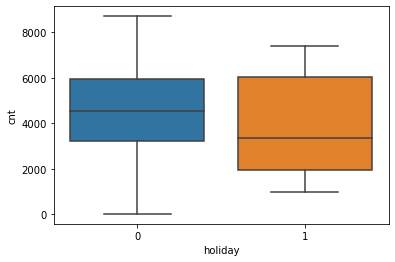

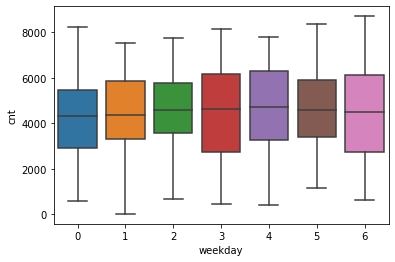

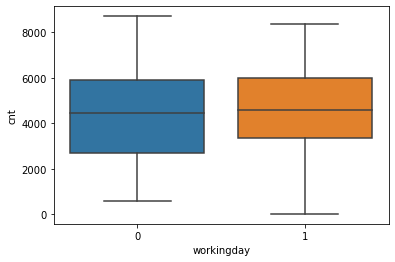

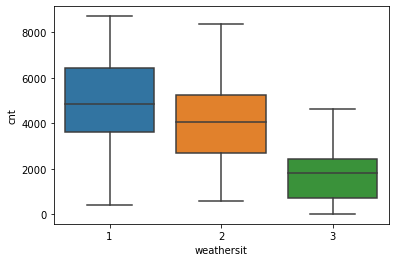

In [372]:
for column in cat_vars:
    plt.figure()
    sns.boxplot(x=column, y="cnt", data=df)


#### Inference
- Most of the numerical variables are approximately following a normal distribution
- The median demand for shared bikes has gone up for 2019
- The median demand for shared bikes is comparatively high during falls
- The demand follows a similar pattern across all days of the week.
- The median demand is higher on clearer days
- We dont see data having weather situations = "heavy rain"
- atemp has the highest correlation with the target variable

### Preparing the data for Modelling

#### Treating the categorical variables 
- We will be using pd.dummy for encoding the categorical variables.
- Using drop_first = True to limit irrelevant variables
- the weathersit has only three categories in data
- there are total 7 categorical variables but 3 of them have binary data inside

In [373]:
season = pd.get_dummies(df['season'], drop_first = True).rename(columns = { 2 : 'summer' , 3 : 'fall' , 4 : 'winter'})
weekday = pd.get_dummies(df['weekday'], drop_first = True).rename(columns = { 1 : 'tuesday' , 2 : 'wednesday', 3:'thursday' , 4 : 'friday' , 5 : 'saturday' , 6 : 'sunday'})
weathersit = pd.get_dummies(df['weathersit'], drop_first = True).rename(columns = { 2 : 'mist', 3 : 'light_snow' , 4 : 'heavy_rain'})
#### for getting all months and index in a dictionary which we are using for renaming
import calendar
months =  list(calendar.month_name)
dict1 = dict(map(reversed, enumerate(months)))
for key in list(calendar.month_name)[:2]: 
    dict1.pop(key)
dict1 = {v: k for k, v in dict1.items()}    
months = pd.get_dummies(df['mnth'], drop_first = True).rename(columns = dict1)

#### concatenating the dummy dfs and dropping the four categorical vars
df = pd.concat([df , season,weekday , months,weathersit ], axis = 1)
df.drop (columns = ['season' , 'weekday' , 'weathersit' , 'mnth'],inplace = True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,tuesday,wednesday,thursday,friday,saturday,sunday,February,March,April,May,June,July,August,September,October,November,December,mist,light_snow
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Train-test split

In [374]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Standardisating the model variables

In [375]:
### we are using standard scaler for rescaling the numerical variables
scaler = StandardScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Visualising the data to understand the linearity in the model

In [376]:
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,tuesday,wednesday,thursday,friday,saturday,sunday,February,March,April,May,June,July,August,September,October,November,December,mist,light_snow
653,1,0,1,-0.121335,-0.055878,-0.514725,-0.117752,1.562685,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
576,1,0,1,1.231731,1.194106,0.516433,-0.330615,1.399629,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,-0.420478,-0.348834,-0.069854,-0.385694,-0.215554,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
728,1,0,0,-1.294913,-1.473492,-1.045032,2.018143,-1.379511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,-0.627580,-0.571474,-1.000840,-0.779889,-0.136589,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,1.273152,1.174464,-0.305544,0.205320,1.116587,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
578,1,0,1,1.448040,1.467501,0.201190,-0.787759,1.422703,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
53,0,0,1,-1.483204,-1.386775,-1.471329,-1.234384,-1.317467,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
350,0,0,0,-1.281106,-1.364170,-0.497048,0.654645,-0.895981,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0


#### Diving the independent & target variable

In [377]:
y_train = df_train.pop('cnt')
X_train = df_train
y_test = df_test.pop('cnt')
X_test = df_test
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((510, 29), (219, 29), (510,), (219,))

### Modelling the data - Creating the baseline model

#### Basemodel with the prepared data

In [378]:
### using sklearn
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) 
print("the fitted regression line has intercept value of -",regressor.intercept_)
print("the fitted regression line has the following coefficient values")
print(pd.DataFrame(list(zip(X_train.columns,regressor.coef_))))

the fitted regression line has intercept value of - -1.1333629310182531
the fitted regression line has the following coefficient values
             0         1
0           yr  1.034921
1      holiday -0.188943
2   workingday  0.195564
3         temp  0.403558
4        atemp  0.047876
5          hum -0.098608
6    windspeed -0.139401
7       summer  0.386838
8         fall  0.216516
9       winter  0.686215
10     tuesday -0.044329
11   wednesday -0.034552
12    thursday  0.025952
13      friday  0.008049
14    saturday  0.051502
15      sunday  0.243045
16    February  0.135442
17       March  0.284587
18       April  0.278847
19         May  0.388892
20        June  0.271254
21        July  0.103795
22      August  0.350496
23   September  0.643445
24     October  0.313142
25    November  0.092626
26    December  0.075739
27        mist -0.272004
28  light_snow -1.144068


#### Predicting the target variables for train & test data

In [379]:
predict_train = regressor.predict(X_train)
predict_test = regressor.predict(X_test)
print("the R2 for train dataset is ",r2_score(y_train,predict_train))
print("the R2 for test dataset is ",r2_score(y_test,predict_test))

the R2 for train dataset is  0.853344113318304
the R2 for test dataset is  0.8281042033054027


#### using statsmodel for model statistics

In [380]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.42e-181
Time:                        21:27:37   Log-Likelihood:                -234.14
No. Observations:                 510   AIC:                             526.3
Df Residuals:                     481   BIC:                             649.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1334      0.103    -11.052      0.0

#### Inference
- Here the null hypothesis associated with each independ variable is 
      h0: the independent variable has no significant effect on the target variable
      h1: the independent variable has significant effect on the target variable
- To reject the null hypothesis , the p-value < 0.05 . we should few variables having p-value > 0.05  . we should get rid away   of these variables  
- The test and train r2 values are in acceptable difference from each other and hence there is no display of bias and variance
- we see a concern of multicollinearity and hence should get way with correlated vars. We can explore VIF for this
- Using RFE for automated feature reduction & this reduce further based on p values & vif

### Model Iterations based on feature reduction

#### RFE - Model Iteration - 1

In [381]:
X_train.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,tuesday,wednesday,thursday,friday,saturday,sunday,February,March,April,May,June,July,August,September,October,November,December,mist,light_snow
653,1.0,1,0,1,-0.121335,-0.055878,-0.514725,-0.117752,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
576,1.0,1,0,1,1.231731,1.194106,0.516433,-0.330615,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1.0,1,0,0,-0.420478,-0.348834,-0.069854,-0.385694,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0,-1.294913,-1.473492,-1.045032,2.018143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0,-0.627580,-0.571474,-1.000840,-0.779889,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [382]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE for reducing to 12 variables
rfe = rfe.fit(X_train, y_train)

In [383]:
### Understanding the variables selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('const', False, 19),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 15),
 ('hum', False, 9),
 ('windspeed', False, 8),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('tuesday', False, 13),
 ('wednesday', False, 14),
 ('thursday', False, 17),
 ('friday', False, 18),
 ('saturday', False, 16),
 ('sunday', True, 1),
 ('February', False, 7),
 ('March', False, 4),
 ('April', False, 6),
 ('May', False, 3),
 ('June', False, 5),
 ('July', False, 10),
 ('August', True, 1),
 ('September', True, 1),
 ('October', False, 2),
 ('November', False, 11),
 ('December', False, 12),
 ('mist', True, 1),
 ('light_snow', True, 1)]

In [384]:
rfe_col = X_train.columns[rfe.support_]
rfe_col ##12 model variables selected by RFE

Index(['yr', 'holiday', 'workingday', 'temp', 'summer', 'fall', 'winter',
       'sunday', 'August', 'September', 'mist', 'light_snow'],
      dtype='object')

In [385]:
X_train.columns[~rfe.support_]

Index(['const', 'atemp', 'hum', 'windspeed', 'tuesday', 'wednesday',
       'thursday', 'friday', 'saturday', 'February', 'March', 'April', 'May',
       'June', 'July', 'October', 'November', 'December'],
      dtype='object')

In [386]:
#### Remodelling with 12 RFE selected models.
X_train_rfe = X_train[rfe_col]
X_test_rfe = X_test[rfe_col]
X_train_rfe = sm.add_constant(X_train_rfe)
X_test_rfe = sm.add_constant(X_test_rfe)
lm1 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     201.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.35e-182
Time:                        21:27:43   Log-Likelihood:                -272.37
No. Observations:                 510   AIC:                             570.7
Df Residuals:                     497   BIC:                             625.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9467      0.073    -13.028      0.0

In [387]:
predict_train = lm1.predict(X_train_rfe)
predict_test = lm1.predict(X_test_rfe)
print("the R2 for train dataset is ",r2_score(y_train,predict_train))
print("the R2 for test dataset is ",r2_score(y_test,predict_test))

the R2 for train dataset is  0.8296238326957297
the R2 for test dataset is  0.8077604008212566


####  Model Iteration 2 based on p-value obtained in first model iterations

In [388]:
high_p_vars = ['fall']

### dropping 'fall' from variable list as fall has the highest p-value in the first model iteration
X_train_pvars = X_train_rfe.drop(columns = high_p_vars)
X_test_pvars = X_test_rfe.drop(columns = high_p_vars)
X_train_pvars = sm.add_constant(X_train_pvars)
X_test_pvars = sm.add_constant(X_test_pvars)
lm = sm.OLS(y_train,X_train_pvars).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.41e-182
Time:                        21:27:48   Log-Likelihood:                -274.28
No. Observations:                 510   AIC:                             572.6
Df Residuals:                     498   BIC:                             623.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8639      0.059    -14.673      0.0

In [389]:
### predicting the target variables based on MOdel Iteration 2
lm = LinearRegression()
X_train_pvars = X_train_pvars.drop(columns='const')
X_test_pvars = X_test_pvars.drop(columns='const')
lm.fit(X_train_pvars,y_train) 

LinearRegression()

#### Checking the VIF of the selected 11 model parameters

In [390]:
vif = pd.DataFrame()
X = X_train_pvars
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop = True)
vif

,Features,VIF
0,workingday,2.65
1,yr,1.85
2,summer,1.62
3,mist,1.56
4,August,1.52
5,winter,1.50
6,temp,1.41
7,sunday,1.37
8,September,1.27
9,light_snow,1.07


#### Coefficients as a measure of feature contribution

In [391]:
lm = LinearRegression()
lm.fit(X_train_pvars,y_train) 
imp = pd.DataFrame()
X = X_train_pvars
imp['Features'] = X.columns
imp['Absolute_Coefficients'] = [np.abs(lm.coef_[i]) for i in range(X.shape[1])]
imp['Coefficients'] = [lm.coef_[i] for i in range(X.shape[1])]
imp['Coefficients'] = round(imp['Coefficients'], 2)
imp = imp.sort_values(by = "Absolute_Coefficients", ascending = False).reset_index(drop = True)
imp

,Features,Absolute_Coefficients,Coefficients
0,light_snow,1.349393,-1.35
1,yr,1.030943,1.03
2,winter,0.656524,0.66
3,temp,0.543424,0.54
4,September,0.539327,0.54
5,summer,0.422047,0.42
6,mist,0.369042,-0.37
7,holiday,0.265323,-0.27
8,August,0.246802,0.25
9,sunday,0.242252,0.24


#### Inference
-  We have finilised the linear model "lm" after two iterations
- there are 11 independent variables in the model.
- We see that VIF for all these 11 variable fall within 3 (<5) 
- We see all the p-values are close to 0.00 and less that 0.05.
- We see the top variables with highest coefficients are light snow(dummy var), yr , winter(dummy var) & temp

### Residual Analysis

#### Checking for normal distribution in the error terms

In [392]:
res = y_train - predict_train

<AxesSubplot:ylabel='Density'>

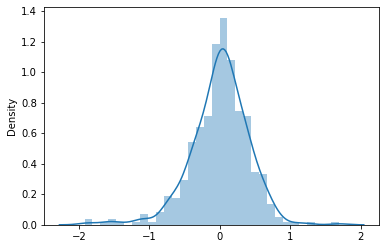

In [393]:
sns.distplot(res)

#### Checking for patterns in the residuals

<AxesSubplot:>

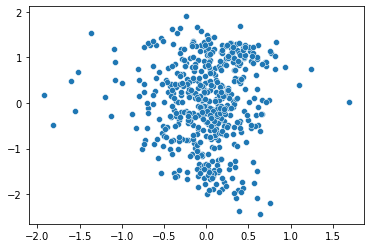

In [394]:
sns.scatterplot( y=predict_train, x=res,hue=None)

#### Inference 
- The error terms are following a normal distribution
- The error terms are centrerd around 0
- The error terms are not following any pattern

### Model Evaluation

In [395]:
predict_train = lm.predict(X_train_pvars)
predict_test = lm.predict(X_test_pvars)
print("the R2 for train dataset is ",r2_score(y_train,predict_train))
print("the R2 for test dataset is ",r2_score(y_test,predict_test))

the R2 for train dataset is  0.8283425445336818
the R2 for test dataset is  0.7998120341762152


In [396]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, predict_test)
mse = mean_squared_error(y_true=y_test, y_pred = predict_test, squared=True)
rmse = mean_squared_error(y_true=y_test, y_pred = predict_test, squared=False)
print('in the test data , we observe that the MAPE : {:.6f}'.format(mape))
print('in the test data , we observe that the MSE: {:.6f}'.format(mse))
print('in the test data , we observe that the RMSE: {:.6f}'.format(rmse))

in the test data , we observe that the MAPE : 1.029104
in the test data , we observe that the MSE: 0.188866
in the test data , we observe that the RMSE: 0.434588


####  Inference 
- We see that all the evaluation metrics MAPE ehich is mean of absolute percentage error , MSE & RMSE falls within the 
  acceptable range
- The train R2 lies around .82 and the test R2 is around .79. This says that ~80%  variance in the target variable is being    explained by the independent variables in the model

###  Final Report
- The dataset consisted of 730 rows & 16 features
- "cnt" which was the demand of shared bikes was the variable to predict
- There existed 7 categorical variables. Few of them were binary & were good to be consumed in the model as it is.
- There were 4 categorical variables which have been encoded to avoid misinterpretation by the algorithm.
- The numerical variables have been resclaled using standardisation to enhance interpretability & restrict computation timing.
- The model was trained on 70% of data and tested on the remaining 30%
- The baseline model gave a test R2 of .82. But there existed p-values > 0.05
- Hence the model was iterated using RFE as a feature reduction technique. A combination of RFE and thorough analysis of p-values & VIF gave the final model "lm"
- The final model "lm" has been trained on 11 independent variables.
- The independent variables included in the final model are - ['yr', 'holiday', 'workingday', 'temp', 'summer', 'winter', 'sunday','August', 'September', 'mist', 'light_snow']
- The test R2 on the final model is ~.8 with MSE of ~.1. This says that 80% of the variance in the target variable "cnt" is being explained by the model 
- The adjusted R value is also ~.82 in train sample which is very close to R2 value .
- The variables of highest contribution or with highest coefficients are light snow(one of the derived dummy variable) , yr ,winter(another derived dummy variable) & temp.
- Light snow shows a negative relation with the target variable
- The residual analysis confirms that error terms are following a normal distribution & dont show any pattern